1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Let matrix A of size (n x k) and matrix of size B is ( k x m). 
The resultant matrix C is of size (n x m).
To compute one element in C 
 C[i][j] = ∑ A[i][p] B[p][j]

we  multiply k pairs of number.
the elements in matrix c is n x m

thererfore, total multiplication is n x m x k.

to sum k term, we need (k-1) addition
for each n x m elements in C , we do k-1 addition.

so, total addition is n x m x (k - 1) 

2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [9]:
import random , time
import numpy as np

n = 100
k = 200
m = 50

import random, time
import numpy as np

n, k, m = 200, 300, 150

# List of lists
A = [[random.random() for _ in range(k)] for _ in range(n)]
B = [[random.random() for _ in range(m)] for _ in range(k)]

start = time.time()
C = [[sum(A[i][p] * B[p][j] for p in range(k)) for j in range(m)] for i in range(n)]
print("List of lists time : ", time.time() - start)

# numpy
A_np = np.array(A)
B_np = np.array(B)

start = time.time()
C_np = A_np @ B_np
print("NumPy time : ", time.time() - start)


List of lists time :  0.8892307281494141
NumPy time :  0.010994434356689453


so numpy is faster than list of lists.

3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [16]:
import numpy as np, time

def median_naive_pass(a):
    a = list(a)
    n = len(a)
    k = n // 2
    for _ in range(k + 1):
        m = min(a)
        a.remove(m)
        kth = m
    if n % 2: return kth
    a = list(a) + [kth]
    a.remove(min(a))
    return (kth + min(a)) / 2

def median_sort(a):
    a = sorted(a)
    n = len(a)
    return a[n//2] if n % 2 else (a[n//2-1] + a[n//2]) / 2

for n in [10000, 50000, 100000]:
    data = np.random.rand(n).tolist()
    for name, func in [("Naive", median_naive_pass), ("Sort", median_sort), ("NumPy", np.median)]:
        t0 = time.time(); func(data); print(f"{name:5} ({n}): {time.time()-t0:.6f}s")
    print()

Naive (10000): 0.835027s
Sort  (10000): 0.001004s
NumPy (10000): 0.000000s

Naive (50000): 19.877991s
Sort  (50000): 0.009006s
NumPy (50000): 0.002002s

Naive (100000): 79.904151s
Sort  (100000): 0.016001s
NumPy (100000): 0.005005s



so numpy is fastest

4.What is the gradient of the following function with respect to x and y? 

       x**2y + y**3 sin(x)


partial differentiation wrt to x  : 2xy + y**3 cos(x)

partial differentiation wrt to y  : x**2 + 3 y**2 sin(x)

In [31]:
import numpy as np
import jax.numpy as jnp
import jax
from scipy.optimize import approx_fprime
import sympy as sp

# --- Function definitions ---
def f_numpy(v):
    x, y = v
    return x**2 * y + y**3 * np.sin(x)

def f_jax(v):
    x, y = v
    return x**2 * y + y**3 * jnp.sin(x)

# Analytical gradient
def grad_analytical(v):
    x, y = v
    return np.array([
        2*x*y + y**3 * np.cos(x),
        x**2 + 3*y**2 * np.sin(x)
    ])

# --- SymPy verification ---
x, y = sp.symbols('x y')
expr = x**2 * y + y**3 * sp.sin(x)
sympy_grad = [sp.diff(expr, var) for var in (x, y)]
print("SymPy Gradient:", sympy_grad)

# --- JAX auto-gradient function ---
grad_f_jax = jax.grad(f_jax)

# --- Gradient checks ---
eps = np.sqrt(np.finfo(float).eps)
np.random.seed(42)

for i in range(5):
    point = np.random.uniform(-5, 5, 2)

    g_analytical = grad_analytical(point)
    g_scipy = approx_fprime(point, f_numpy, eps)
    g_jax = np.array(grad_f_jax(jnp.array(point)))

    print(f"\nPoint {i+1}: x={point[0]:.4f}, y={point[1]:.4f}")
    print("Analytical:", g_analytical)
    print("SciPy:     ", g_scipy)
    print("JAX:       ", g_jax)

    assert np.allclose(g_analytical, g_scipy, atol=1e-6)
    assert np.allclose(g_analytical, g_jax, atol=1e-6)

print("\n All gradients match!")


In [29]:
import sympy as sp

# Define variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("∂f/∂x =", sp.simplify(df_dx))
print("∂f/∂y =", sp.simplify(df_dy))


∂f/∂x = y*(2*x + y**2*cos(x))
∂f/∂y = x**2 + 3*y**2*sin(x)


Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [34]:
students_data = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 85
                }
            },
            {
                "Roll Number": 2,
                "Name": "M",
                "Marks": {
                    "Maths": 90,
                    "English": 80,
                    "Science": 78
                }
            }
        ],
        "Branch 2": [
            {
                "Roll Number": 3,
                "Name": "K",
                "Marks": {
                    "Maths": 88,
                    "English": 92,
                    "Science": 84
                }
            }
        ]
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}

# Example: Accessing a student's marks
print(students_data[2022]["Branch 1"][0]["Marks"]["Maths"])  # Output: 100


100


8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [37]:
# Class to store marks for subjects
class Marks:
    def __init__(self, **subjects):
        self.subjects = subjects  # Dictionary of subject: marks

    def __repr__(self):
        return str(self.subjects)


# Class to represent a Student
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # Marks object

    def __repr__(self):
        return f"Roll: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"


# Class to represent a Branch
class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # list of Student objects

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch: {self.name}, Students: {self.students}"


# Class to represent a Year
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # list of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year: {self.year}, Branches: {self.branches}"


# ----- Example Usage -----

# Create main database (list of Year objects)
database = []

# Create a Year
year_2022 = Year(2022)

# Create Branches
branch1 = Branch("Branch 1")
branch2 = Branch("Branch 2")

# Create Students
student1 = Student(1, "N", Marks(Maths=100, English=70, Science=85))
student2 = Student(2, "M", Marks(Maths=90, English=80, Science=78))
student3 = Student(3, "K", Marks(Maths=88, English=92, Science=84))

# Add students to branches
branch1.add_student(student1)
branch1.add_student(student2)
branch2.add_student(student3)

# Add branches to year
year_2022.add_branch(branch1)
year_2022.add_branch(branch2)

# Add year to database
database.append(year_2022)

# Print the database
for year in database:
    print(year)


Year: 2022, Branches: [Branch: Branch 1, Students: [Roll: 1, Name: N, Marks: {'Maths': 100, 'English': 70, 'Science': 85}, Roll: 2, Name: M, Marks: {'Maths': 90, 'English': 80, 'Science': 78}], Branch: Branch 2, Students: [Roll: 3, Name: K, Marks: {'Maths': 88, 'English': 92, 'Science': 84}]]


9.Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



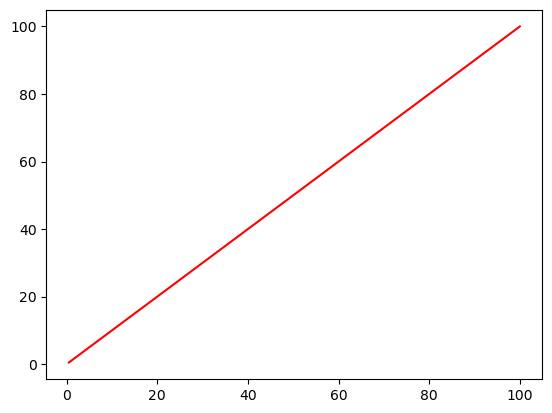

In [41]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5,100.5,0.5)

y = x 

plt.plot(x,y , color  = 'red')
plt.show()

In [ ]:
y = x**2

plt.plot (x,y, color = 'blue')
plt.show()

In [ ]:
y= x**3/100
plt.plot(y,x, color = 'green')
plt.show()

In [ ]:
y = np.sin(x)

plt.plot(x,y, color = 'red')
plt.show()

In [ ]:
y = np.sin(x)/x

plt.plot(x,y, color = 'green')
plt.show()

In [ ]:
y = np.log(x)

plt.plot(x,y, color = 'blue')
plt.show()

In [ ]:
y = np.exp(x)

plt.plot(x,y ,color  = 'red')
plt.show()

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [ ]:
matrix = np.random.uniform(low = 1 ,high = 2 ,size =(20,5) )
matrix
import pandas as pd

df =pd.DataFrame( data = matrix , columns = ['a','b','c','d','e'] )
df
df.std()
print(df.std().idxmax())
df.mean(axis = 1)
print(df.mean(axis = 1).idxmin())

df['g'] = np.where(df['f'] < 8 ,'LT8','GT8')
print(df )  

std_dev = df.groupby('g')['f'].std()
print(std_dev)


12.Write a small piece of code to explain broadcasting in numpy.

In [50]:
a = np.array([[1], [2], [3]])   # shape (3, 1)
print(a)
b = np.array([10, 20, 30])     # shape (3,) → (1, 3)
print(b)
print(a + b)

[[1]
 [2]
 [3]]
[10 20 30]
[[11 21 31]
 [12 22 32]
 [13 23 33]]


13.Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [48]:
import numpy as np

def my_argmin(arr):
    # Ensure the array is NumPy type
    arr = np.asarray(arr)
    
    min_index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    
    return min_index

# Example
arr = np.array([50, 20, 80, 100, 70])
print("My argmin:", my_argmin(arr))
print("NumPy argmin:", np.argmin(arr))

My argmin: 1
NumPy argmin: 1
